In [1]:
# Importing python built in libraries

import numpy as np
import pandas as pd

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To scale our data
from sklearn.preprocessing import scale

# To perform K-means clustering
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
#importing the data
country_data = pd.read_csv(r'‪C:\Users\metimats\Desktop\Country-data.csv')
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
country_data.shape

(167, 10)

In [5]:
country_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [6]:
# Checking Null values
100*(country_data.isnull().sum()/len(country_data.index))

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [7]:
#Lets remove the country column as we will scale the numerical data
#And lets store in in seperate one to use it later
country_col = country_data['country'].reset_index(drop=True)
country_data_nonscaled = country_data.drop(['country'],axis=1)

# Scaling the data

In [8]:
#scaling the data to proceed further
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
country_data_scaled = standard_scaler.fit_transform(country_data_nonscaled)

colnames = list(country_data_nonscaled.columns)
country_data_scaled = pd.DataFrame(country_data_scaled, columns=colnames)
print(country_data_scaled.shape)
country_data_scaled.head()

(167, 9)


C:\Users\metimats\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\metimats\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


# Performing PCA on scaled data

In [9]:
# Importing the PCA module
from sklearn.decomposition import PCA
pca1 = PCA(svd_solver='randomized', random_state=42)

# Doing PCA on the scaled dataframe
pca1.fit(country_data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [10]:
# Checking the variance explained by each Principal Component
pca1.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

In [11]:
# Checking the cumulative variance explained by Principal Component
import numpy as np
variance_ratio_cum_sum=np.cumsum(np.round(pca1.explained_variance_ratio_, decimals=4)*100)
print(variance_ratio_cum_sum)

[45.95 63.13 76.13 87.18 94.52 97.   98.26 99.24 99.98]


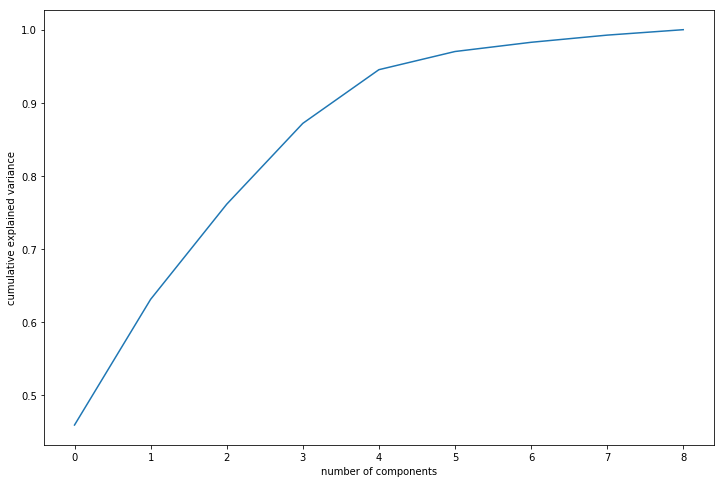

In [12]:
# screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

From the above plot;
we see that the no of components(PC) = 5, which explains maximum of 94% to 95%

In [13]:
# Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(n_components=5,svd_solver='randomized', random_state=42)

In [14]:
# Doing PCA on the scaled data
pca.fit(country_data_scaled)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [15]:
# Assessing the Principal Component
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662]])

In [18]:
# Applying transform 
pca_transform = pca.transform(country_data_scaled)
pca_transform

array([[-2.91302459e+00,  9.56205755e-02, -7.18118495e-01,
         1.00525464e+00, -1.58310044e-01],
       [ 4.29911330e-01, -5.88155666e-01, -3.33485505e-01,
        -1.16105859e+00,  1.74677321e-01],
       [-2.85225077e-01, -4.55174413e-01,  1.22150481e+00,
        -8.68114503e-01,  1.56474647e-01],
       [-2.93242265e+00,  1.69555507e+00,  1.52504374e+00,
         8.39625014e-01, -2.73208934e-01],
       [ 1.03357587e+00,  1.36658709e-01, -2.25720917e-01,
        -8.47062687e-01, -1.93006961e-01],
       [ 2.24072616e-02, -1.77918658e+00,  8.69997116e-01,
        -3.69668667e-02,  9.81056507e-01],
       [-1.01583737e-01, -5.68251724e-01,  2.42091816e-01,
        -1.46626576e+00, -5.59924282e-02],
       [ 2.34216461e+00, -1.98845915e+00,  1.90344188e-01,
         1.10503778e+00, -7.31192330e-01],
       [ 2.97376366e+00, -7.34688659e-01, -5.19766356e-01,
         1.20544210e+00,  8.35797058e-02],
       [-1.81486997e-01, -4.02865873e-01,  8.67458743e-01,
        -4.38772983e-01

In [16]:
# Checking the variance explained by each Principal Component
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211])

In [17]:
# Checking the cumulative variance explained by Principal Component
variance_ratio_cum_sum=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(variance_ratio_cum_sum)

[45.95 63.13 76.13 87.18 94.52]


In [19]:
# creating correlation matrix between principal components
corrmat = np.corrcoef(pca_transform.transpose())

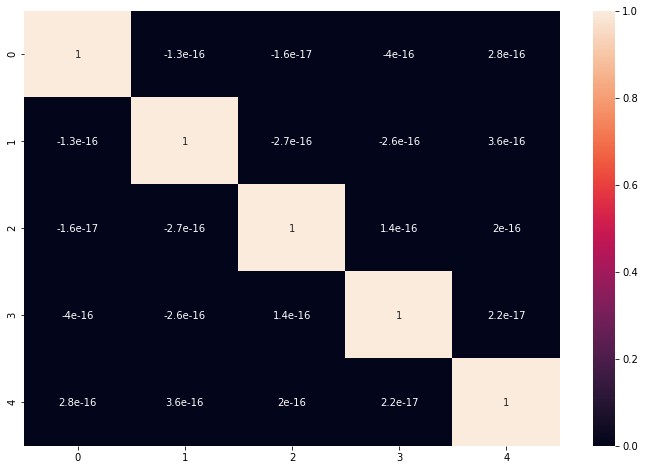

In [20]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (12,8))
sns.heatmap(corrmat,annot = True)
plt.show()

In [21]:
#Chosing 5 principle components and Understanding how the original variables are loaded on the principal components.
colnames = list(country_data_scaled.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3],'PC4':pca.components_[3],'PC5':pca.components_[4]})
pcs_df

,Feature,PC1,PC2,PC3,PC4,PC5
0,child_mort,-0.419519,0.192884,-0.029544,0.370653,-0.168970
1,exports,0.283897,0.613163,0.144761,0.003091,0.057616
2,health,0.150838,-0.243087,-0.596632,0.461897,0.518000
3,imports,0.161482,0.671821,-0.299927,-0.071907,0.255376
4,income,0.398441,0.022536,0.301548,0.392159,-0.247150
5,inflation,-0.193173,-0.008404,0.642520,0.150442,0.714869
6,life_expec,0.425839,-0.222707,0.113919,-0.203797,0.108220
7,total_fer,-0.403729,0.155233,0.019549,0.378304,-0.135262
8,gdpp,0.392645,-0.046022,0.122977,0.531995,-0.180167


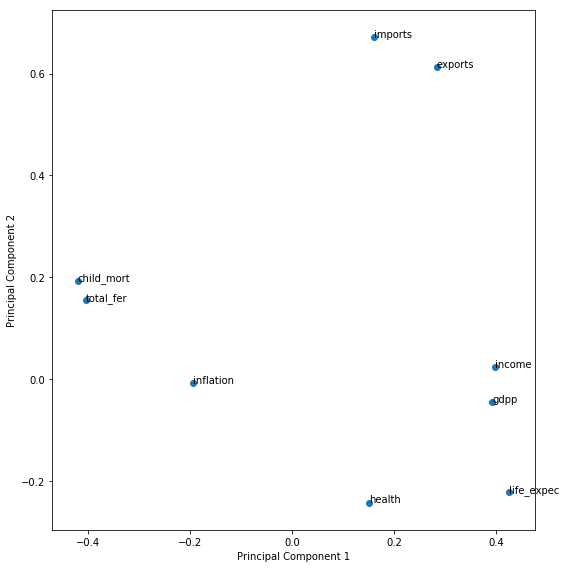

In [22]:
#  visualise how these features are loaded
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [23]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(pca_transform)

In [25]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4]})
pcs_df2.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475
3,-2.932423,1.695555,1.525044,0.839625,-0.273209
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007


# Clustering

In [26]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [27]:
#checking the Hopkins measure, and we are sure to implement clusterting algorithm on the data set as hopkins measure > 0.5
hopkins(pcs_df2)

0.8042080292240174

In [28]:
kmeans_data = pcs_df2

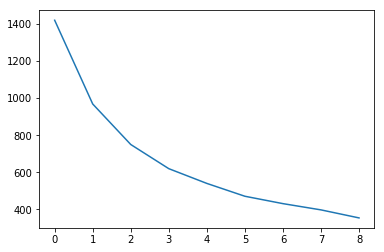

In [29]:
#Now let's proceed to the elbow curve method to decide the number of clusters.
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(kmeans_data)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [34]:
#Here also we're seeing a distinct bend at around 3 clusters. Hence it seems a good K to choose.
#Let's perform K means using K=3
model_clus2 = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
model_clus2.fit(pcs_df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [35]:
dat4=pcs_df2
dat4.index = pd.RangeIndex(len(dat4.index))
dat_km = pd.concat([dat4, pd.Series(model_clus2.labels_)], axis=1)
dat_km.columns = ['PC1', 'PC2','PC3', 'PC4','PC5','ClusterID']
dat_km.head()

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,1
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,2
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,2
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,1
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,2


In [36]:
# Checking country counts in each cluster formed.
dat_km['ClusterID'].value_counts()

2    84
1    47
0    36
Name: ClusterID, dtype: int64

In [37]:
# Merging the data set to see clusterwise assignment in detail
dat5=pd.merge(country_data,dat_km, left_index=True,right_index=True)
dat5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.913025,0.095621,-0.718118,1.005255,-0.158310,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.429911,-0.588156,-0.333486,-1.161059,0.174677,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.285225,-0.455174,1.221505,-0.868115,0.156475,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.932423,1.695555,1.525044,0.839625,-0.273209,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.033576,0.136659,-0.225721,-0.847063,-0.193007,2


In [96]:
dat6=dat5.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
dat6.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [39]:
#clu_country= 	pd.DataFrame(dat6.groupby(["ClusterID"]).country.mean())
clu_child_mort= 	pd.DataFrame(dat6.groupby(["ClusterID"]).child_mort.mean())
clu_exports = 	pd.DataFrame(dat6.groupby(["ClusterID"]).exports.mean())
clu_health = 	pd.DataFrame(dat6.groupby(["ClusterID"]).health.mean())
clu_imports= 	pd.DataFrame(dat6.groupby(["ClusterID"]).imports.mean())
clu_income= 	pd.DataFrame(dat6.groupby(["ClusterID"]).income.mean())
clu_inflation = 	pd.DataFrame(dat6.groupby(["ClusterID"]).inflation.mean())
clu_life_expec = 	pd.DataFrame(dat6.groupby(["ClusterID"]).life_expec.mean())
clu_total_fer= 	pd.DataFrame(dat6.groupby(["ClusterID"]).total_fer.mean())
clu_gdpp= 	pd.DataFrame(dat6.groupby(["ClusterID"]).gdpp.mean())

In [40]:
df_Kmeans = pd.concat([pd.Series([0,1,2]),clu_child_mort,clu_exports,clu_health,clu_imports,clu_income,clu_inflation,clu_life_expec,clu_total_fer,clu_gdpp], axis=1)

In [41]:
df_Kmeans.columns = ["ClusterID","child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]
df_Kmeans

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444
1,1,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
2,2,21.927381,40.243917,6.200952,47.473404,12305.595238,7.600905,72.814286,2.307500,6486.452381


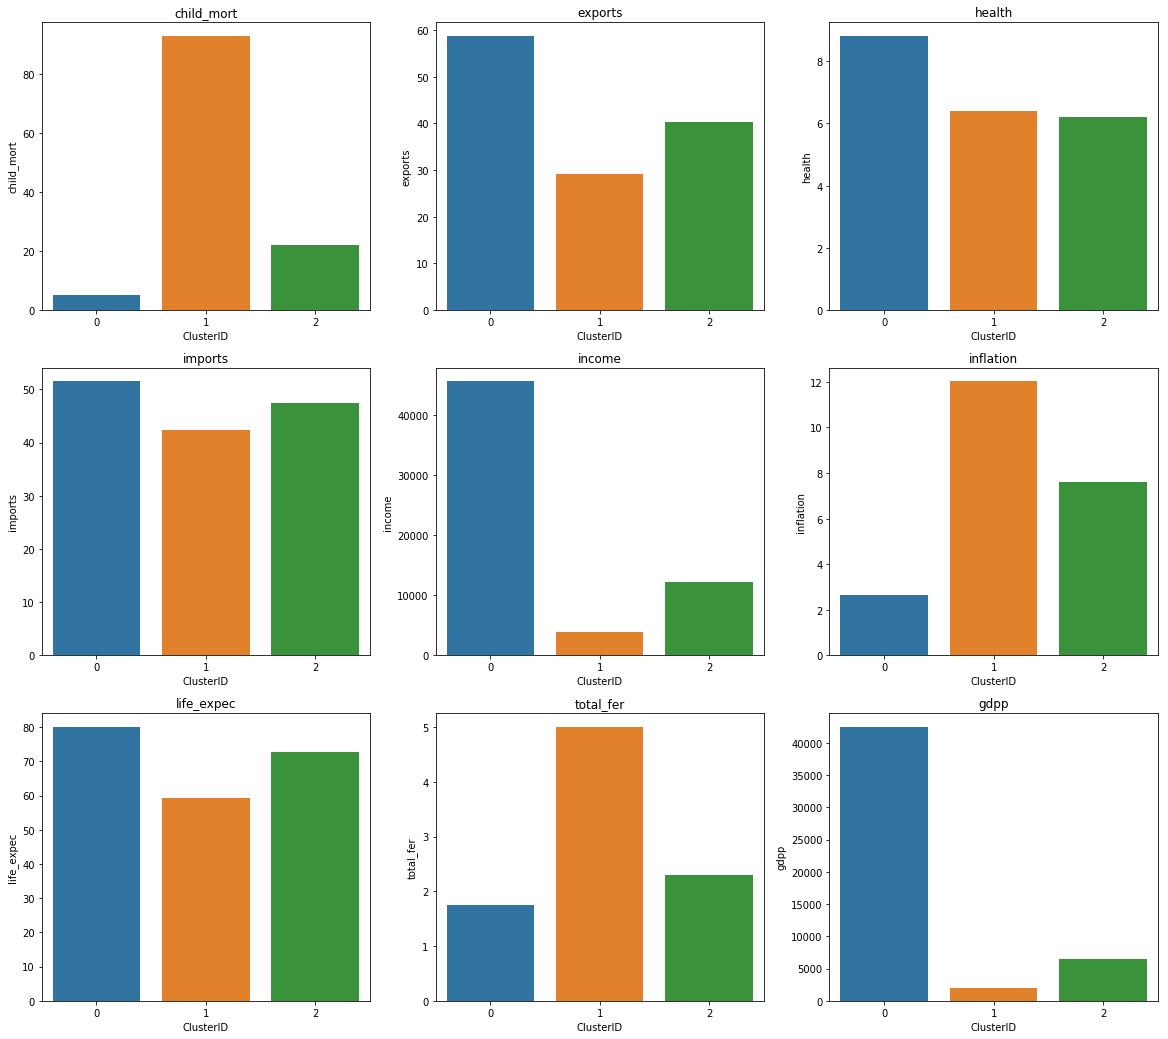

In [61]:
# Defining figure and axes for subplots
fig,ax = plt.subplots(3,3,figsize=(20,18))


# Plot for child_mort mean analysis for every cluster
sns.barplot(x = df_Kmeans.ClusterID, y = df_Kmeans.child_mort, ax=ax[0,0])
ax[0,0].set_title('child_mort')


# Plot for exports mean analysis for every cluster
sns.barplot(x = df_Kmeans.ClusterID, y = df_Kmeans.exports, ax=ax[0,1])
ax[0,1].set_title('exports')


# Plot for health mean analysis for every cluster
sns.barplot(x = df_Kmeans.ClusterID, y = df_Kmeans.health, ax=ax[0,2])
ax[0,2].set_title('health')


# Plot for imports mean analysis for every cluster
sns.barplot(x = df_Kmeans.ClusterID, y = df_Kmeans.imports, ax=ax[1,0])
ax[1,0].set_title('imports')


# Plot for income mean analysis for every cluster
sns.barplot(x = df_Kmeans.ClusterID, y = df_Kmeans.income, ax=ax[1,1])
ax[1,1].set_title('income')


# Plot for inflation mean analysis for every cluster
sns.barplot(x = df_Kmeans.ClusterID, y = df_Kmeans.inflation, ax=ax[1,2])
ax[1,2].set_title('inflation')


# Plot for life_expec mean analysis for every cluster
sns.barplot(x = df_Kmeans.ClusterID, y = df_Kmeans.life_expec, ax=ax[2,0])
ax[2,0].set_title('life_expec')


# Plot for total_fer mean analysis for every cluster
sns.barplot(x = df_Kmeans.ClusterID, y = df_Kmeans.total_fer, ax=ax[2,1])
ax[2,1].set_title('total_fer')


# Plot for gdpp mean analysis for every cluster
sns.barplot(x = df_Kmeans.ClusterID, y = df_Kmeans.gdpp, ax=ax[2,2])
ax[2,2].set_title('gdpp')


plt.show()

From the above plots of individual variabes.

Its very clear that the countries falling in cluster 1 are the one in need of Fund from the NGO for progress

In [66]:
#Lets see the top 5 countries with lowest GDP under which cluster they fall into
dat6.sort_values(by=['gdpp'], inplace=True)
dat6[['ClusterID','country','child_mort','gdpp','income','inflation']].head(5)

,ClusterID,country,child_mort,gdpp,income,inflation
26,1,Burundi,93.6,231,764,12.30
88,1,Liberia,89.3,327,700,5.47
37,1,"Congo, Dem. Rep.",116.0,334,609,20.80
112,1,Niger,123.0,348,814,2.55
132,1,Sierra Leone,160.0,399,1220,17.20


We can see that the top 5 countries fall under cluster 1 as they have very low GDPP

# Hierarchical clustering

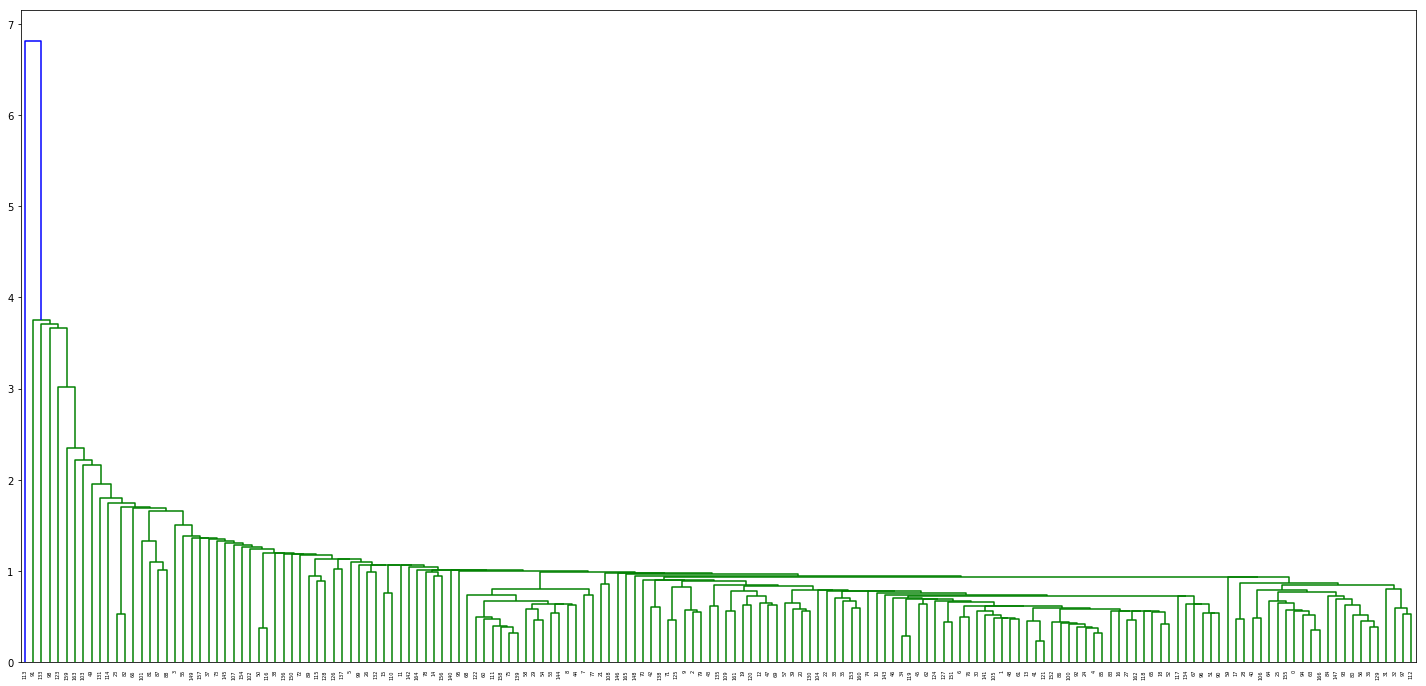

In [79]:
# heirarchical clustering by single method
plt.figure(figsize=(25,12))
mergings = linkage(pcs_df2, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

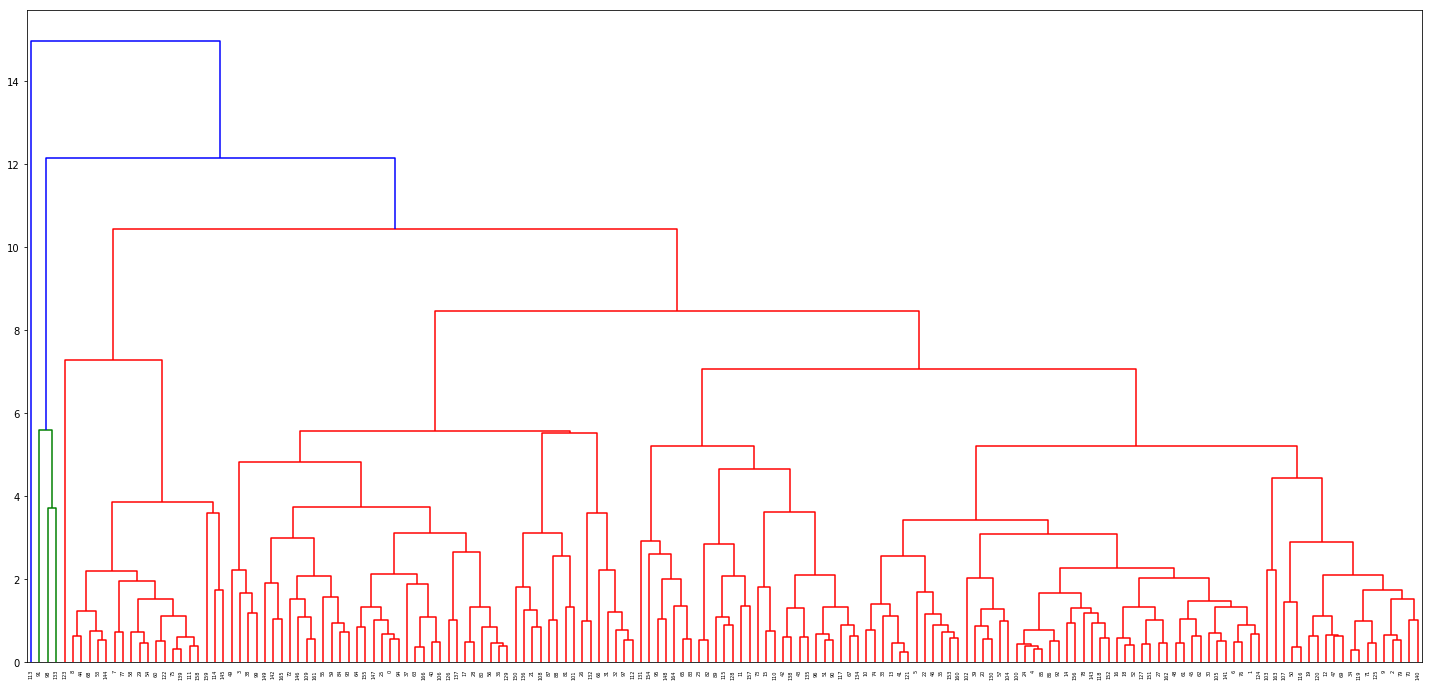

In [80]:
# heirarchical clustering by complete method
plt.figure(figsize=(25,12))
mergings = linkage(pcs_df2, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [81]:
#Cutting the dendrogram at an appropriate level and deciding number of clusters k=5

clusterCut = pd.Series(cut_tree(mergings, n_clusters = 5).reshape(-1,))
dat_hc = pd.concat([pcs_df2, clusterCut], axis=1)



dat_hc.columns = ['PC1', 'PC2','PC3', 'PC4','PC5','ClusterID']

dat_hc.head()

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,0
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,1
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,1
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,0
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,1


In [82]:
# Checking country counts in each cluster formed.
dat_hc['ClusterID'].value_counts()

1    94
0    49
2    20
3     3
4     1
Name: ClusterID, dtype: int64

In [83]:
dat7=pd.merge(country_data,dat_hc, left_index=True,right_index=True)
dat7.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.913025,0.095621,-0.718118,1.005255,-0.158310,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.429911,-0.588156,-0.333486,-1.161059,0.174677,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.285225,-0.455174,1.221505,-0.868115,0.156475,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.932423,1.695555,1.525044,0.839625,-0.273209,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.033576,0.136659,-0.225721,-0.847063,-0.193007,1


In [59]:
#Top 5 countries with lowest GDP belongs to ClusterID 0 as expected
dat7.sort_values(by=['gdpp'], inplace=True)

dat7[['ClusterID','country','child_mort','gdpp','income','inflation']].head(5)

,ClusterID,country,child_mort,gdpp,income,inflation
26,0,Burundi,93.6,231,764,12.30
88,0,Liberia,89.3,327,700,5.47
37,0,"Congo, Dem. Rep.",116.0,334,609,20.80
112,0,Niger,123.0,348,814,2.55
132,0,Sierra Leone,160.0,399,1220,17.20


In [84]:
#calculating the mean value of all individual variables
hc_child_mort= pd.DataFrame(dat7.groupby(["ClusterID"]).child_mort.mean())
hc_exports = pd.DataFrame(dat7.groupby(["ClusterID"]).exports.mean())
hc_health = pd.DataFrame(dat7.groupby(["ClusterID"]).health.mean())
hc_imports= pd.DataFrame(dat7.groupby(["ClusterID"]).imports.mean())
hc_income= pd.DataFrame(dat7.groupby(["ClusterID"]).income.mean())
hc_inflation = pd.DataFrame(dat7.groupby(["ClusterID"]).inflation.mean())
hc_life_expec = pd.DataFrame(dat7.groupby(["ClusterID"]).life_expec.mean())
hc_total_fer= pd.DataFrame(dat7.groupby(["ClusterID"]).total_fer.mean())
hc_gdpp= pd.DataFrame(dat7.groupby(["ClusterID"]).gdpp.mean())

In [85]:
#concating the obtained data
df_hc_cluster = pd.concat([pd.Series([0,1,2,3,4]),hc_child_mort,hc_exports,hc_health,hc_imports,hc_income,hc_inflation,hc_life_expec,hc_total_fer,hc_gdpp], axis=1)

In [86]:
df_hc_cluster.columns = ["ClusterID","child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]
df_hc_cluster

,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,87.667347,29.704082,6.737143,45.200000,3834.755102,10.063980,59.757143,4.841633,1905.306122
1,1,19.819149,44.081904,6.153723,47.687935,16902.234043,7.006617,73.748936,2.235106,10167.276596
2,2,4.500000,35.635000,10.210000,32.290000,44460.000000,1.820250,80.875000,1.749500,47045.000000
3,3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
4,4,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000


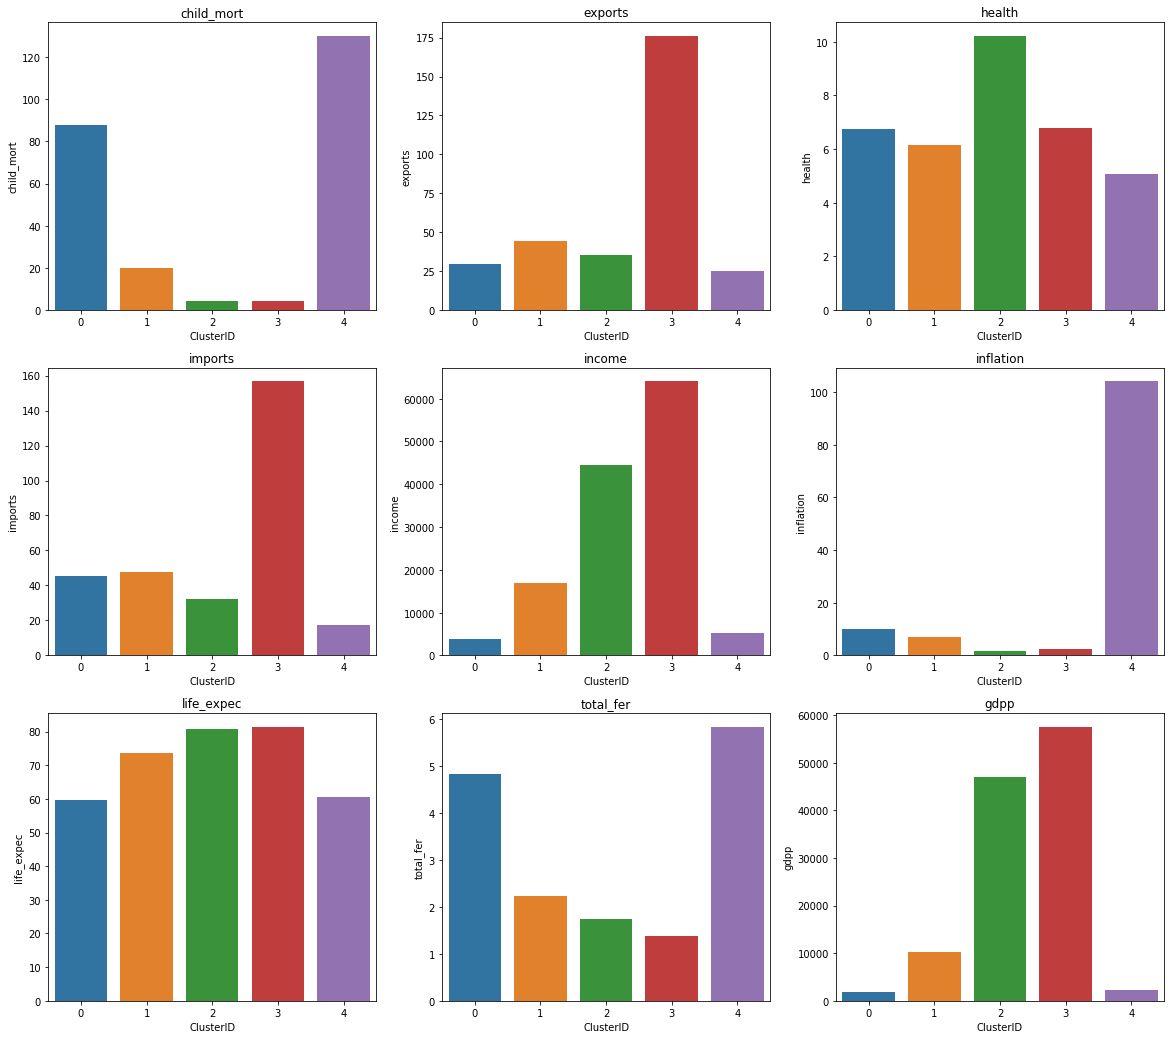

In [90]:
# Defining figure and axes for subplots
fig,ax = plt.subplots(3,3,figsize=(20,18))


# Plot for child_mort mean analysis for every cluster
sns.barplot(x = df_hc_cluster.ClusterID, y = df_hc_cluster.child_mort, ax=ax[0,0])
ax[0,0].set_title('child_mort')


# Plot for exports mean analysis for every cluster
sns.barplot(x = df_hc_cluster.ClusterID, y = df_hc_cluster.exports, ax=ax[0,1])
ax[0,1].set_title('exports')


# Plot for health mean analysis for every cluster
sns.barplot(x = df_hc_cluster.ClusterID, y = df_hc_cluster.health, ax=ax[0,2])
ax[0,2].set_title('health')


# Plot for imports mean analysis for every cluster
sns.barplot(x = df_hc_cluster.ClusterID, y = df_hc_cluster.imports, ax=ax[1,0])
ax[1,0].set_title('imports')


# Plot for income mean analysis for every cluster
sns.barplot(x = df_hc_cluster.ClusterID, y = df_hc_cluster.income, ax=ax[1,1])
ax[1,1].set_title('income')


# Plot for inflation mean analysis for every cluster
sns.barplot(x = df_hc_cluster.ClusterID, y = df_hc_cluster.inflation, ax=ax[1,2])
ax[1,2].set_title('inflation')


# Plot for life_expec mean analysis for every cluster
sns.barplot(x = df_hc_cluster.ClusterID, y = df_hc_cluster.life_expec, ax=ax[2,0])
ax[2,0].set_title('life_expec')


# Plot for total_fer mean analysis for every cluster
sns.barplot(x = df_hc_cluster.ClusterID, y = df_hc_cluster.total_fer, ax=ax[2,1])
ax[2,1].set_title('total_fer')


# Plot for gdpp mean analysis for every cluster
sns.barplot(x = df_hc_cluster.ClusterID, y = df_hc_cluster.gdpp, ax=ax[2,2])
ax[2,2].set_title('gdpp')


plt.show()

In [99]:
#Top 5 countries with lowest GDP belongs to ClusterID 0 
dat7.sort_values(by=['gdpp'], inplace=True)

dat7[['ClusterID','country','child_mort','gdpp','income','inflation']].head()

,ClusterID,country,child_mort,gdpp,income,inflation
26,0,Burundi,93.6,231,764,12.30
88,0,Liberia,89.3,327,700,5.47
37,0,"Congo, Dem. Rep.",116.0,334,609,20.80
112,0,Niger,123.0,348,814,2.55
132,0,Sierra Leone,160.0,399,1220,17.20


# Analysis for Outliers

In [93]:
country_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


From the above table we clearly see that there are outliers
1. child_mort:
    max value= 208; mean value= 38.27
2. exports:
    max value= 200; mean value= 41.10
3. imports:
    max value= 174; mean value= 46.89
4. inflation:
    max value= 104; mean value= 7.78
5. gdpp:
    max vaue= 105000; mean value= 12964

However we have only 167 number of countries

Lets check the cluster_0 data to get more insights about the outliers


In [98]:
# Selecting countries assigned ClusterId = 0
cluster_0 = dat6.loc[dat6['ClusterID'] == 0]
print('No. of countries in cluster_0 are:', len(cluster_0))
cluster_0

No. of countries in cluster_0 are: 36


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,0
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,0
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,0
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,0
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,0
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,0
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,0
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,0


+ And these outliers clearly indicate us that the developed countries having high growth rates are the one which are in the form of Outliers

+ From the above list of countries falling under the cluster_0

+ It is very evident that these countries variables explain and confirm that they are the outliers present in the dataset

+ Hence instead of removing the outliers we have retained them and while performig clustering they are grouped into a single cluster

+ This way we were able to retain the complete data and use them in clustering process and treating them sucessfully.